In [ ]:
!pip install -q dlib==19.18.0 -vv
!pip install -q face-recognition-models==0.3.0
!pip install -q face_recognition==1.3.0

Выходные данные были обрезаны до нескольких последних строк (5000).
                   from /tmp/pip-install-y914vo1g/dlib_95de1dab3e034395a136d97498db09d4/tools/python/src/svm_c_trainer.cpp:4:
  /tmp/pip-install-y914vo1g/dlib_95de1dab3e034395a136d97498db09d4/dlib/external/pybind11/include/pybind11/detail/internals.h:170:31: warning: ‘int PyThread_set_key_value(int, void*)’ is deprecated [-Wdeprecated-declarations]
    170 |         PyThread_set_key_value(internals_ptr->tstate, tstate);
        |         ~~~~~~~~~~~~~~~~~~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  In file included from /usr/include/python3.10/Python.h:122,
                   from /tmp/pip-install-y914vo1g/dlib_95de1dab3e034395a136d97498db09d4/dlib/external/pybind11/include/pybind11/detail/common.h:111,
                   from /tmp/pip-install-y914vo1g/dlib_95de1dab3e034395a136d97498db09d4/dlib/external/pybind11/include/pybind11/pytypes.h:12,
                   from /tmp/pip-install-y914vo1g/dlib_95de1dab3e034395a136d97498db

In [ ]:
import face_recognition
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt


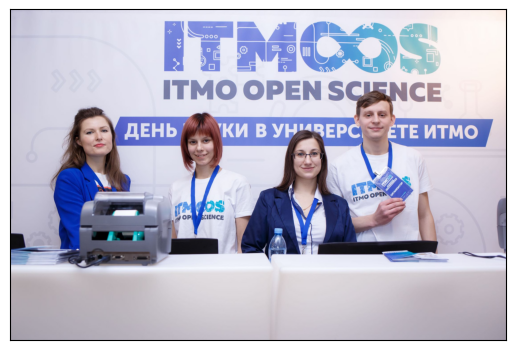

In [ ]:
file_name = "/content/5.jpeg"


image = face_recognition.load_image_file(file_name)
plt.imshow(image) # Обработка данных на изображении image
plt.xticks([])
plt.yticks([])
plt.show()

Максимальное количество пикселей, составляющих губы:  596


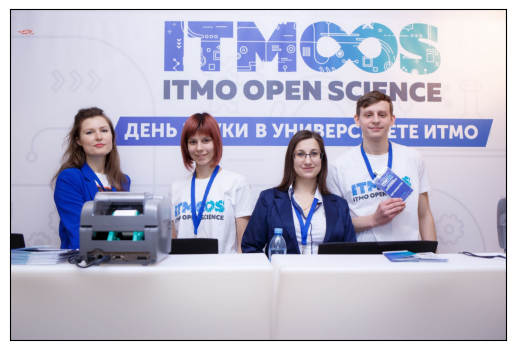

In [ ]:
# Определение координат лиц на изображении
face_locations = face_recognition.face_locations(image)

# Находим черты лиц на изображении
face_landmarks_list = face_recognition.face_landmarks(image)

pil_image = Image.fromarray(image)

max_lip_pixels = 0

for face_location, face_landmarks in zip(face_locations, face_landmarks_list):
    top, right, bottom, left = face_location
    face_image = image[top:bottom, left:right]
    face_landmarks = face_recognition.face_landmarks(face_image)[0]

    # Создаем изображение для заливки губ
    mask_image = Image.new("L", pil_image.size, 0)
    mask_draw = ImageDraw.Draw(mask_image)

    # Заливаем верхнюю и нижнюю губы
    mask_draw.polygon(face_landmarks['top_lip'], fill=1)
    mask_draw.polygon(face_landmarks['bottom_lip'], fill=1)

    # Подсчитываем количество залитых пикселей
    mask_array = np.array(mask_image)
    lip_pixels = np.sum(mask_array)

    # Сравниваем и сохраняем максимальное значение
    if lip_pixels > max_lip_pixels:
        max_lip_pixels = lip_pixels

    # Отрисовываем полигоны на оригинальном изображении
    d = ImageDraw.Draw(pil_image)
    d.line(face_landmarks['top_lip'], fill=(150, 0, 0), width=2)
    d.line(face_landmarks['bottom_lip'], fill=(150, 0, 0), width=2)
    d.polygon(face_landmarks['top_lip'], outline=(255, 255, 255))
    d.polygon(face_landmarks['bottom_lip'], outline=(255, 255, 255))

print("Максимальное количество пикселей, составляющих губы: ", max_lip_pixels)

# Показать изображение с отрисованными губами
plt.imshow(pil_image)
plt.xticks([])
plt.yticks([])
plt.show()

Координаты лица (в пикселях) Верхний: 612, Левый: 1271, Нижний: 741, Правый: 1400
3290742


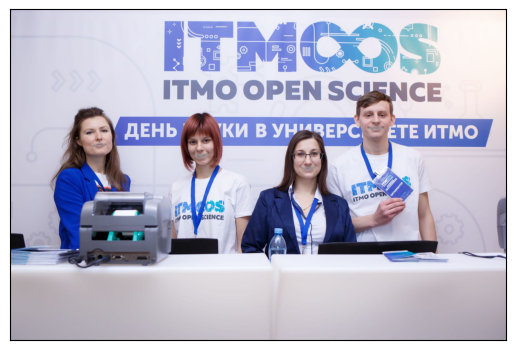

Координаты лица (в пикселях) Верхний: 425, Левый: 1560, Нижний: 580, Правый: 1715
3290742


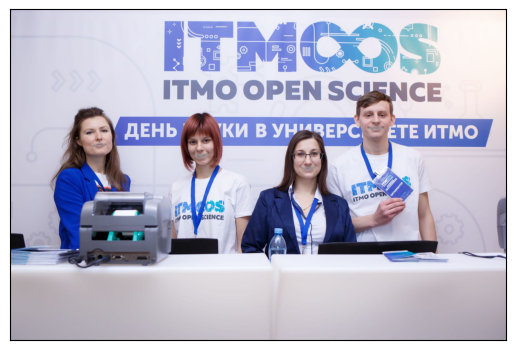

Координаты лица (в пикселях) Верхний: 512, Левый: 325, Нижний: 641, Правый: 454
3290742


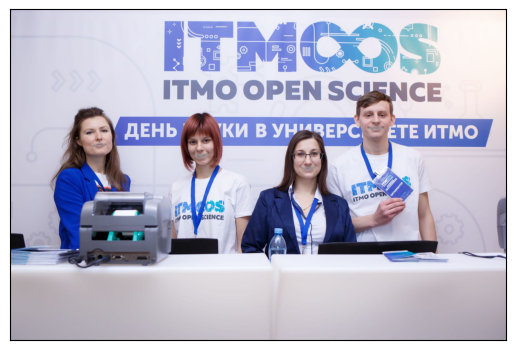

Координаты лица (в пикселях) Верхний: 555, Левый: 784, Нижний: 684, Правый: 913
3290742


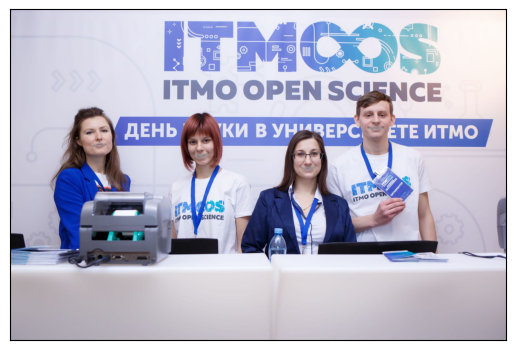

In [ ]:
face_locations = face_recognition.face_locations(image)
face_landmarks_list = face_recognition.face_landmarks(image)
for face_location in face_locations:

    # Выводим координаты каждого лица на изображении
    top, right, bottom, left = face_location
    print("Координаты лица (в пикселях) Верхний: {}, Левый: {}, Нижний: {}, Правый: {}".format(top, left, bottom, right))
    face_image = image[top:bottom, left:right]



    pil_image = Image.fromarray(image)
    d = ImageDraw.Draw(pil_image)

    for face_landmarks in face_landmarks_list:
      d.line(face_landmarks['top_lip'],fill=(150, 150, 150, 64), width=4)
      d.line(face_landmarks['bottom_lip'], fill=(150, 150, 150, 64), width=4)
      c = 0
      for pixel in pil_image.getdata():
          if (pixel == (150, 150, 150, 64)):
            c += 1

      ans = max(ans, c)

    print(ans)
    plt.imshow(pil_image) # Обработка данных на изображении image
    plt.xticks([])
    plt.yticks([])
    plt.show()

3290742
3290742
3290742
3290742


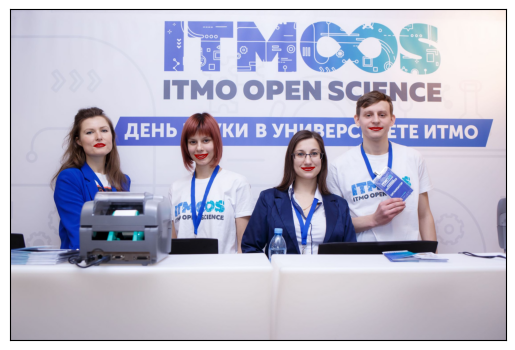

In [ ]:
# находим черты лиц на изображении
face_landmarks_list = face_recognition.face_landmarks(image)

pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

for face_landmarks in face_landmarks_list:
    d.line(face_landmarks['top_lip'],fill=(150, 0, 0, 64), width=1)
    d.line(face_landmarks['bottom_lip'], fill=(150, 0, 0, 64), width=1)
    c = 0
    for pixel in pil_image.getdata():
        if (pixel != (0, 0, 0)):
          c += 1

    ans = max(ans, c)

        print(ans)
plt.imshow(pil_image) # Обработка данных на изображении image
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
face_landmarks_list = face_recognition.face_landmarks(image)
pil_image = Image.fromarray(image)
print(face_landmarks_list)
ans = 0

for face_landmarks in face_landmarks_list:
    print(face_landmarks['top_lip'])
    d = ImageDraw.Draw(pil_image, 'RGB')
    d.polygon([(0,0),pil_image.size], fill = (0,0,0) )
    d.line(face_landmarks['top_lip'], fill=(150, 0, 0, 64), width=4)
    d.line(face_landmarks['bottom_lip'], fill=(150, 0, 0, 64), width=4)
    c = 0
    for pixel in pil_image.getdata():
      if (pixel != (0, 0, 0)):
        c += 1

    ans = max(ans, c)

    print(ans)

[{'chin': [(1267, 659), (1267, 675), (1269, 692), (1271, 709), (1277, 725), (1288, 740), (1303, 750), (1321, 758), (1339, 760), (1356, 756), (1370, 747), (1382, 734), (1390, 719), (1393, 702), (1393, 685), (1393, 667), (1391, 651)], 'left_eyebrow': [(1278, 639), (1285, 632), (1296, 628), (1307, 629), (1317, 633)], 'right_eyebrow': [(1347, 631), (1357, 626), (1368, 624), (1379, 627), (1386, 635)], 'nose_bridge': [(1333, 649), (1334, 662), (1335, 675), (1336, 689)], 'nose_tip': [(1322, 696), (1328, 698), (1336, 700), (1343, 697), (1349, 694)], 'left_eye': [(1292, 652), (1299, 647), (1307, 648), (1316, 653), (1307, 654), (1299, 655)], 'right_eye': [(1350, 652), (1358, 645), (1366, 644), (1373, 648), (1367, 652), (1359, 652)], 'top_lip': [(1304, 710), (1317, 710), (1328, 708), (1336, 709), (1344, 707), (1354, 707), (1365, 707), (1361, 709), (1344, 713), (1337, 715), (1328, 714), (1309, 712)], 'bottom_lip': [(1365, 707), (1355, 716), (1346, 721), (1338, 723), (1329, 723), (1317, 719), (1304